## IRIS 데이터 또는 다른 데이터를 이용하여
### 1. knn에서 weights='distance'로 준 경우와 'uniform' (default)인 경우를 비교하라. 

In [2]:
!pip install seaborn

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
print(iris.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [5]:
print(iris.shape)

(150, 5)


In [6]:
X = iris.drop('species', axis=1)
print(X.shape)

(150, 4)


In [7]:
y = iris['species']
print(y.shape)

(150,)


In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)
print('species labels:', np.unique(y))

species labels: [0 1 2]


In [9]:
yo = classle.inverse_transform(y)
print('species:', np.unique(yo))

species: ['setosa' 'versicolor' 'virginica']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1, 
                                                    stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### 참고 - KNeighborsClassifier
#### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### KNN 적용 (1) - weights = 'distance'

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
knn1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [12]:
y_train_pred1 = knn1.predict(X_train)
y_test_pred1 = knn1.predict(X_test)
print('Misclassified training samples: %d' % (y_train != y_train_pred1).sum())
print('Misclassified training samples: %d' % (y_test != y_test_pred1).sum())

Misclassified training samples: 0
Misclassified training samples: 1


In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred1))

0.9777777777777777


### KNN 적용 (2) - weights = 'uniform' (default)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform')
knn2.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_train_pred2 = knn2.predict(X_train)
y_test_pred2 = knn2.predict(X_test)
print('Misclassified training samples: %d' % (y_train != y_train_pred2).sum())
print('Misclassified training samples: %d' % (y_test != y_test_pred2).sum())

Misclassified training samples: 2
Misclassified training samples: 1


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred2))

0.9777777777777777


### 2. 교재의 데이터를 이용하여 bandwidth(ㅅ)를 조절하여 그 효과를 논의하고 'gaussian' 이외의 kernel을 적용하여 차이를 비교하라

In [17]:
import matplotlib.pyplot as plt
import numpy as np
xx = X['sepal_length'].values
xx = xx.T.reshape(-1, 1)

### Bandwidth 조절
#### 0.2, 0.5, 0.7, 1

In [18]:
from sklearn.neighbors import KernelDensity
kd1 = KernelDensity(bandwidth=0.2, kernel='gaussian')
kd1.fit(xx)

KernelDensity(bandwidth=0.2)

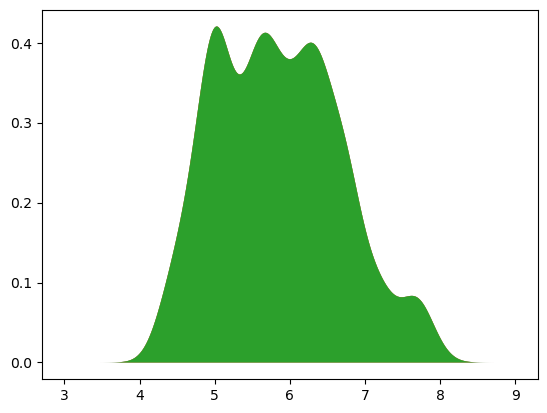

In [21]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

In [22]:
kd2 = KernelDensity(bandwidth=0.5, kernel='gaussian')
kd2.fit(xx)

KernelDensity(bandwidth=0.5)

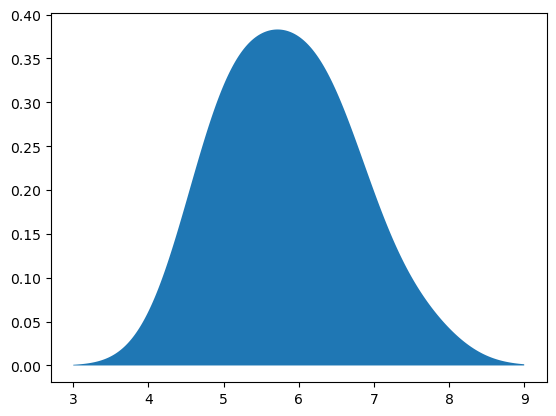

In [23]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd2.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

In [28]:
kd3 = KernelDensity(bandwidth=0.7, kernel='gaussian')
kd3.fit(xx)

KernelDensity(bandwidth=0.7)

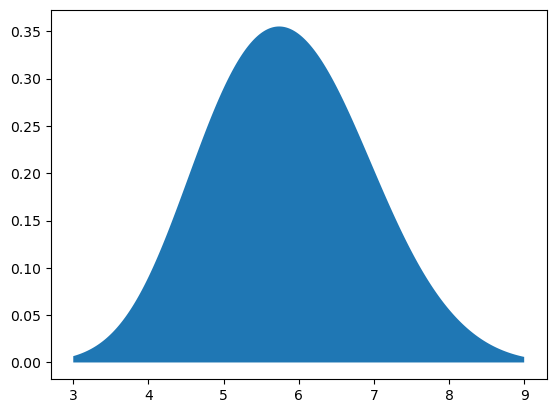

In [29]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd3.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

In [30]:
kd4 = KernelDensity(bandwidth=1, kernel='gaussian')
kd4.fit(xx)

KernelDensity(bandwidth=1)

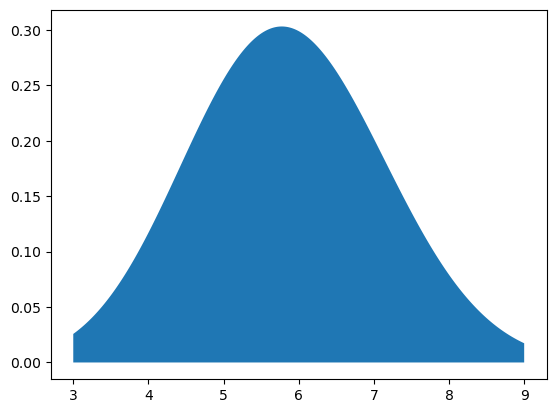

In [31]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd4.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

### Sklearn.neighbors.KernelDensity - kernel 조절
#### 'gaussian’, ‘tophat’, ‘epanechnikov’, ‘exponential’, ‘linear’, ‘cosine'

### gaussian

In [32]:
kd1 = KernelDensity(bandwidth=0.2, kernel='gaussian')
kd1.fit(xx)

KernelDensity(bandwidth=0.2)

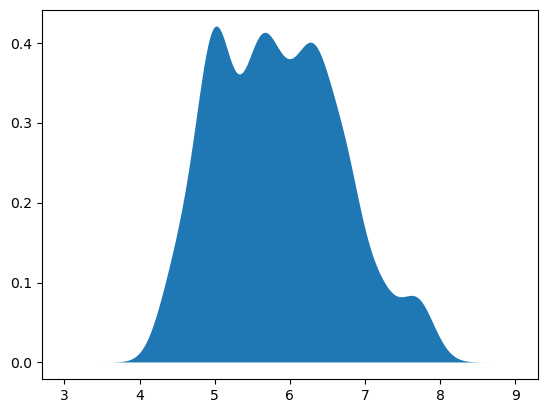

In [33]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

### tophat

In [34]:
kd1 = KernelDensity(bandwidth=0.2, kernel='tophat')
kd1.fit(xx)

KernelDensity(bandwidth=0.2, kernel='tophat')

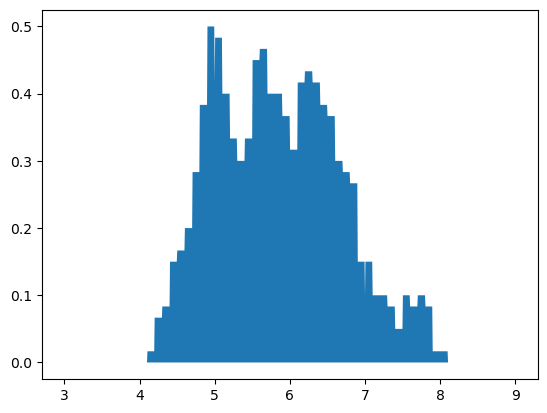

In [35]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

### epanechnikov

In [36]:
kd1 = KernelDensity(bandwidth=0.2, kernel='epanechnikov')
kd1.fit(xx)

KernelDensity(bandwidth=0.2, kernel='epanechnikov')

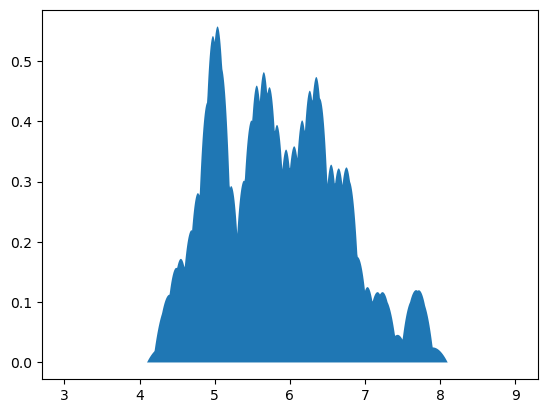

In [37]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

### exponential

In [38]:
kd1 = KernelDensity(bandwidth=0.2, kernel='exponential')
kd1.fit(xx)

KernelDensity(bandwidth=0.2, kernel='exponential')

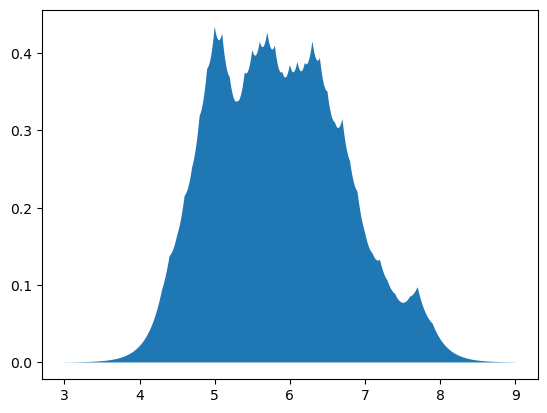

In [39]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

### linear

In [40]:
kd1 = KernelDensity(bandwidth=0.2, kernel='linear')
kd1.fit(xx)

KernelDensity(bandwidth=0.2, kernel='linear')

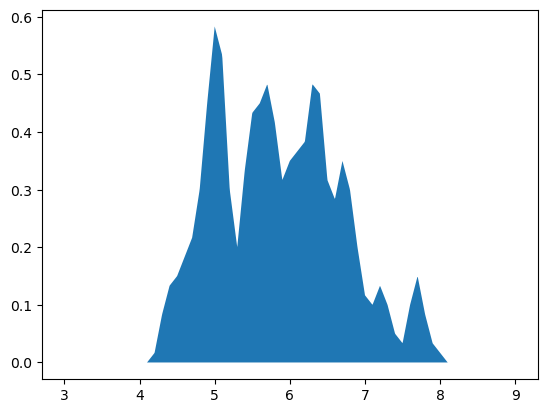

In [41]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()

### cosine

In [42]:
kd1 = KernelDensity(bandwidth=0.2, kernel='cosine')
kd1.fit(xx)

KernelDensity(bandwidth=0.2, kernel='cosine')

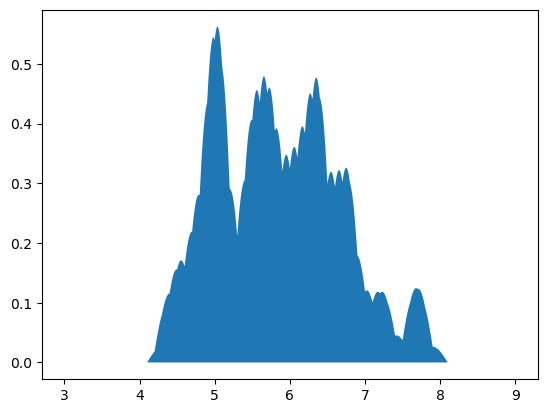

In [43]:
xx_d = np.linspace(3, 9, 1000)
logprob = kd1.score_samples(xx_d.reshape(-1, 1))
plt.fill_between(xx_d, np.exp(logprob))
plt.show()